Captsone Mini Project
Author: Allan Brett
Date: Feb, 2023
----------------

Code Description

For my project I decided the sloth dataset from kaggle (https://www.kaggle.com/datasets/bafbc3981680a36353231bf20f9e4d222d58844688c984a086f4fea8b7455402). I really like sloths, and altough the data is not particularily complicated, I felt I had to use it.

Sloth data
----------------
I have split my data analysis into two few different steps. First I classify sloth species based on physical characteristics. This turns out to be quite straightforward as the species can be seperated quite easily by tail length. Next I attempt to classify the sub-species of sloths based on their physical characteristics. For the "three-toed" sloths, the very imbalanced nature of the dataset lead to a more difficult evaluation/interpretation of the models. 

Load in and explore dataset

In [1]:
import pandas as pd
import numpy as np

sloths = pd.read_csv('sloth_data.csv', encoding='utf-8')

Investigate dataset

In [2]:
sloths.head(10)

,Unnamed: 0,claw_length_cm,endangered,size_cm,specie,sub_specie,tail_length_cm,weight_kg
0,0,6.825,critically_endangered,52.004,three_toed,Pygmy three-toed sloth,4.448,3.570
1,1,8.260,critically_endangered,50.082,three_toed,Pygmy three-toed sloth,6.286,2.844
2,2,8.662,critically_endangered,51.498,three_toed,Pygmy three-toed sloth,4.551,1.259
3,3,8.467,critically_endangered,50.122,three_toed,Pygmy three-toed sloth,6.983,2.392
4,4,7.104,critically_endangered,51.364,three_toed,Pygmy three-toed sloth,5.411,3.163
5,5,7.268,critically_endangered,50.540,three_toed,Pygmy three-toed sloth,3.672,3.305
6,6,7.195,critically_endangered,49.662,three_toed,Pygmy three-toed sloth,4.179,2.854
7,7,7.455,critically_endangered,50.990,three_toed,Pygmy three-toed sloth,3.418,3.861
8,8,6.773,critically_endangered,48.389,three_toed,Pygmy three-toed sloth,6.601,4.492
9,9,8.160,critically_endangered,49.495,three_toed,Pygmy three-toed sloth,4.058,0.964


In [3]:
sloths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   claw_length_cm  5000 non-null   float64
 2   endangered      5000 non-null   object 
 3   size_cm         5000 non-null   float64
 4   specie          5000 non-null   object 
 5   sub_specie      5000 non-null   object 
 6   tail_length_cm  5000 non-null   float64
 7   weight_kg       5000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 312.6+ KB


In [4]:
sloths.isnull().sum()

Unnamed: 0        0
claw_length_cm    0
endangered        0
size_cm           0
specie            0
sub_specie        0
tail_length_cm    0
weight_kg         0
dtype: int64

The dataset contains no missing values and both can be classified using numeric data. Therefore, no inputation or data mapping required. Next determine features. Specie and sub_specie are the targets, so drop them. Then drop the "unnamed" and "endagered" columns since we will focus on classifying the sloths by physical characteristics.

In [5]:

to_drop_sloth = ['Unnamed: 0','endangered','specie','sub_specie']
sloths_X = sloths.drop(to_drop_sloth,axis=1)
sloths_y = sloths['specie']
sloths_sub_y = sloths['sub_specie']

View distribution of data to determine if data is balanced

<AxesSubplot:>

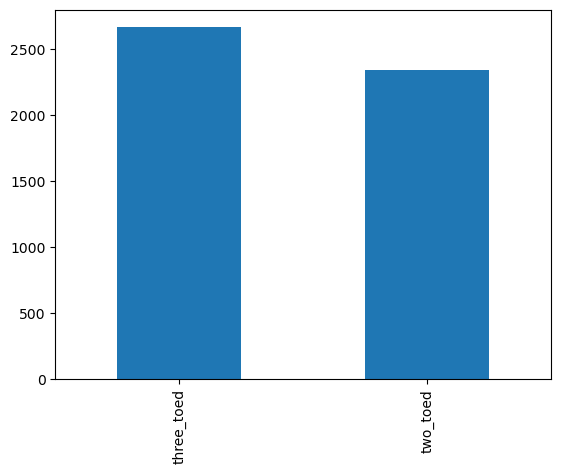

In [6]:
sloths['specie'].value_counts().plot.bar()

The above plot shows that the data is balanced with respect to the "specie" column. 

Next, get a sense of outliers in the data using boxplot

<AxesSubplot:xlabel='specie', ylabel='weight_kg'>

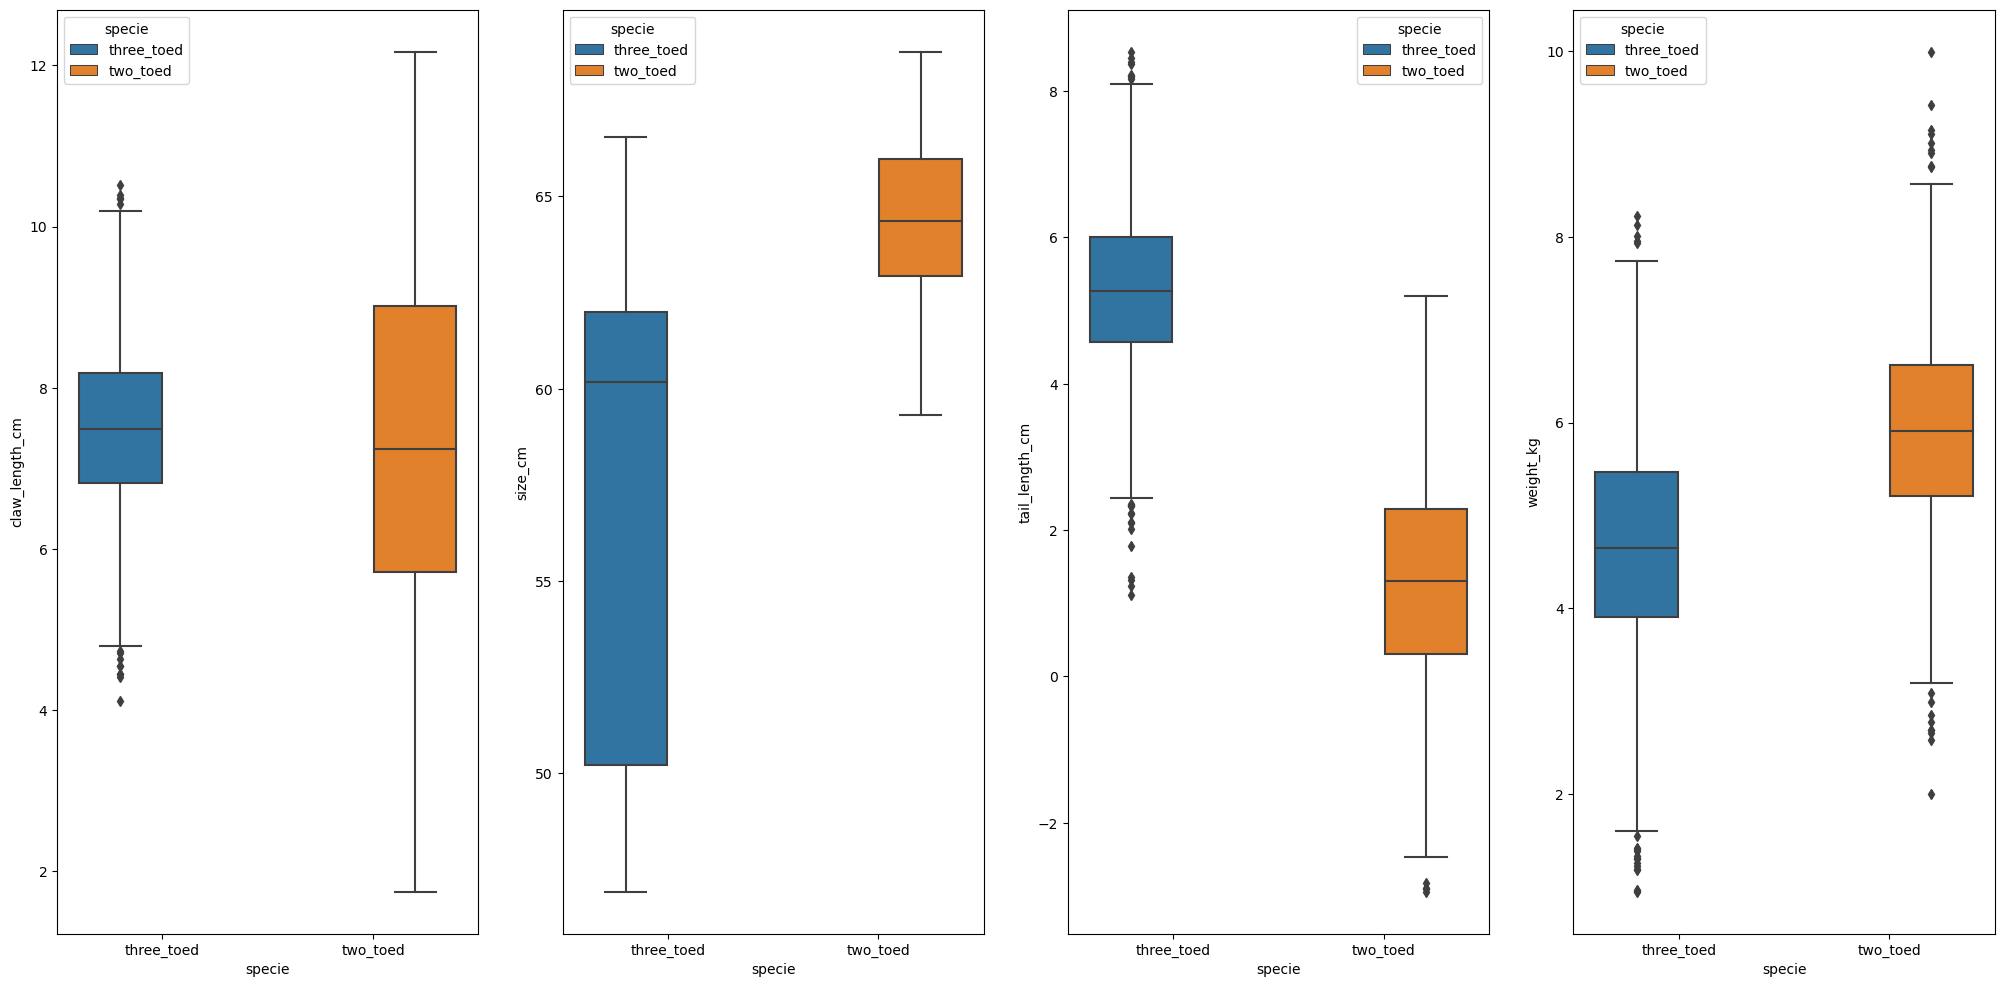

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows=1, ncols=4, figsize = (25, 12))
sns.boxplot(ax=ax1, x = 'specie', y = 'claw_length_cm', hue = 'specie', data = sloths)
sns.boxplot(ax=ax2, x = 'specie', y = 'size_cm', hue = 'specie', data = sloths)
sns.boxplot(ax=ax3, x = 'specie', y = 'tail_length_cm', hue = 'specie', data = sloths)
sns.boxplot(ax=ax4, x = 'specie', y = 'weight_kg', hue = 'specie', data = sloths)

There does appear to be quite a few outliers in the data, therefore data scaling is recommended.

Also explore the correlations between the data fields

<AxesSubplot:>

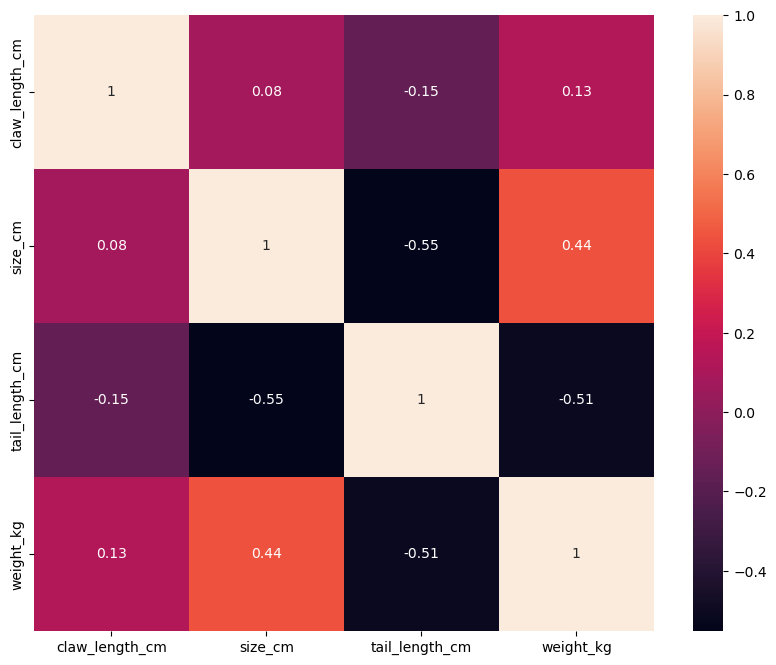

In [8]:
corr = sloths_X.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True)

No variables are particularily correlated. Highest positive correlation found between size and weight which is an expected relationship. However, no correlation is high enough to warrant dropping any features. 

Now train a simple decision tree model with hyper-parameter tuning on depth

Train/Test/Split

In [9]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

sloths_X_train, sloths_X_test, sloths_y_train, sloths_y_test = train_test_split(sloths_X, sloths_y, shuffle=True, test_size=0.33, random_state=42)

Scale the data

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

#use a dummy variable to easily set which scaler is used and investigate any differences

which_scaler = 2

if which_scaler == 1:
    sloths_X_stdscale_train = sloths_X_train
    sloths_X_stdscale_test = sloths_X_test
elif which_scaler == 2 or which_scaler == 3: 

    if which_scaler == 2:
        scaler = StandardScaler()
    elif which_scaler == 3:    
        scaler = MinMaxScaler()
    sloths_X_stdscale_train = scaler.fit_transform(sloths_X_train)
    sloths_X_stdscale_test = scaler.transform(sloths_X_test)

Surprisingly scaling does not increase the accuracy of the models. For example accuracy with/witout scaling with the Decision Tree classifier:
    
No scaling (accuracy = 0.9727), StandardScaler (accuracy =  0.9727), MinMax scaler (accuracy =  0.9727)

Decision Tree Classifier

Hyper Parameter Turning

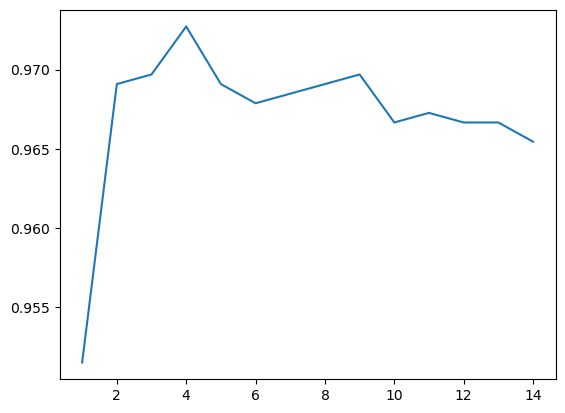

In [11]:
#Create model and determine accuracy - run a loop and graph
import matplotlib.pyplot as plt

accuracy = []
depth = range(1,15)

for i in range(1,15):

    sloths_model = DecisionTreeClassifier(random_state = 42,  max_depth = i)

    sloths_model.fit(sloths_X_stdscale_train, sloths_y_train)

    sloths_y_pred = sloths_model.predict(sloths_X_stdscale_test)
    accuracy.append(accuracy_score(sloths_y_test, sloths_y_pred))
    
plt.plot(depth, accuracy)

From the above plot we can see the ideal depth for decision tree is 4, so use for the model going forward

In [12]:
#create tuned model and output accuracy

from sklearn.metrics import classification_report, confusion_matrix

sloths_model = DecisionTreeClassifier(random_state = 42, max_depth = 4)
sloths_model.fit(sloths_X_stdscale_train, sloths_y_train)
sloths_y_pred = sloths_model.predict(sloths_X_stdscale_test)

dt_accuracy = accuracy_score(sloths_y_test, sloths_y_pred)
#print accuracy of model
print('Accuracy Score: \n', accuracy_score(sloths_y_test, sloths_y_pred))
print('Classification Report: \n', classification_report(sloths_y_test, sloths_y_pred))


Accuracy Score: 
 0.9727272727272728
Classification Report: 
               precision    recall  f1-score   support

  three_toed       0.98      0.97      0.97       901
    two_toed       0.97      0.97      0.97       749

    accuracy                           0.97      1650
   macro avg       0.97      0.97      0.97      1650
weighted avg       0.97      0.97      0.97      1650



Graph important features

<AxesSubplot:ylabel='feature'>

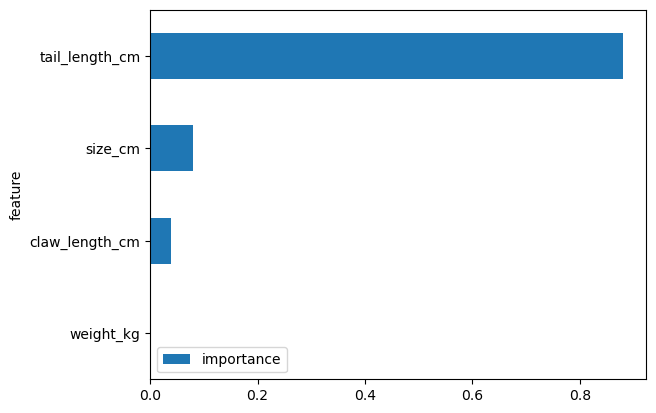

In [13]:

sloths_features = sloths_X.columns
sloths_model.feature_importances_
list(zip(sloths_features, sloths_model.feature_importances_))

important_features = pd.DataFrame(list(zip(sloths_features, sloths_model.feature_importances_)), columns=['feature', 'importance'])
important_features.set_index('feature', inplace=True)
important_features.sort_values(by='importance').plot(kind='barh')

Interpretation

This basic model turns out to be very robust with tail length being the most important feature distinguishing the species of sloths. When visualized this realationship is clear (see figure below).

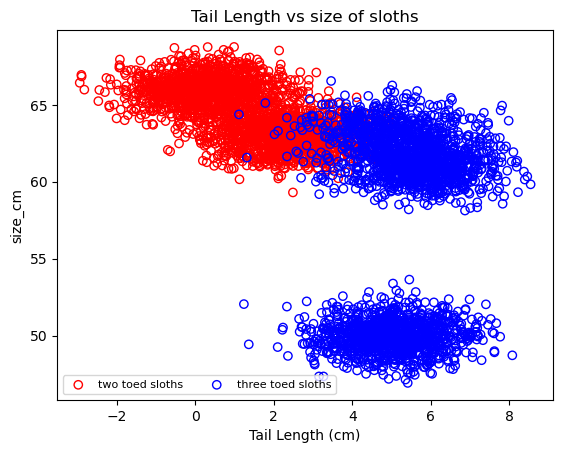

In [14]:
#plot two most important features against eachother to view the classification

two_toe = sloths.loc[(sloths["specie"] == "two_toed"), ["specie", "tail_length_cm", "size_cm"]]
three_toe = sloths.loc[(sloths["specie"] == "three_toed"), ["specie", "tail_length_cm", "size_cm"]]

two_toe_plt = plt.scatter(two_toe["tail_length_cm"], two_toe["size_cm"], facecolors='none', edgecolors='r')
three_toe_plt =plt.scatter(three_toe["tail_length_cm"], three_toe["size_cm"], facecolors='none', edgecolors='b')

plt.legend((two_toe_plt, three_toe_plt),
           ('two toed sloths', 'three toed sloths'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.title('Tail Length vs size of sloths')
plt.xlabel('Tail Length (cm)')
plt.ylabel('size_cm')
plt.show()

What is apparent is that there is a clear division between the sub-species of three-toed sloths with respect to size. We will investigate this relationship in a later section. First we will investigate how two other models (random forest and gradient boosting classifier) perform for classification of sloth species with default hyper-parameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(sloths_X_stdscale_train, sloths_y_train)
sloths_y_pred = rf_model.predict(sloths_X_stdscale_test)

rf_accuracy = accuracy_score(sloths_y_test, sloths_y_pred)
print('Accuracy Score: \n', accuracy_score(sloths_y_test, sloths_y_pred))
print('Classification Report: \n', classification_report(sloths_y_test, sloths_y_pred))

Accuracy Score: 
 0.9775757575757575
Classification Report: 
               precision    recall  f1-score   support

  three_toed       0.98      0.98      0.98       901
    two_toed       0.97      0.98      0.98       749

    accuracy                           0.98      1650
   macro avg       0.98      0.98      0.98      1650
weighted avg       0.98      0.98      0.98      1650



In [17]:
gbc_model = GradientBoostingClassifier(random_state = 42)
gbc_model.fit(sloths_X_stdscale_train, sloths_y_train)
sloths_y_pred = gbc_model.predict(sloths_X_stdscale_test)

gbc_accuracy = accuracy_score(sloths_y_test, sloths_y_pred)

print('Accuracy Score: \n', accuracy_score(sloths_y_test, sloths_y_pred))
print('Classification Report: \n', classification_report(sloths_y_test, sloths_y_pred))

Accuracy Score: 
 0.9787878787878788
Classification Report: 
               precision    recall  f1-score   support

  three_toed       0.99      0.97      0.98       901
    two_toed       0.97      0.98      0.98       749

    accuracy                           0.98      1650
   macro avg       0.98      0.98      0.98      1650
weighted avg       0.98      0.98      0.98      1650



Now let's compare the three model accuracies. 

In [18]:
import plotly.express as px

data = [['Decision Tree', dt_accuracy], ['RandomForest', rf_accuracy], ['Gradient Boosting Classifier', gbc_accuracy]]
df = pd.DataFrame(data, columns=['Model Name', 'Accuracy'])

fig = px.bar(df, x='Model Name', y='Accuracy', title = 'Model Accuracies for Sloth Species Classification')
fig.show()

While the original decision tree model already performed quite well, both random forest and gradient boosting classifier did perform ever to slightly marginally better.

In this next section we will classify the subspecies of sloth. The data is split based on species and moving forward we will focus on the three-toed sloths only. Although the code will run for a selection of both three-toed and two-toed data subsets, the discussion will focus soley on the three-toed sloth data as this data is more interesting (there are only 2 sub-species of two-toed sloth.)

<AxesSubplot:>

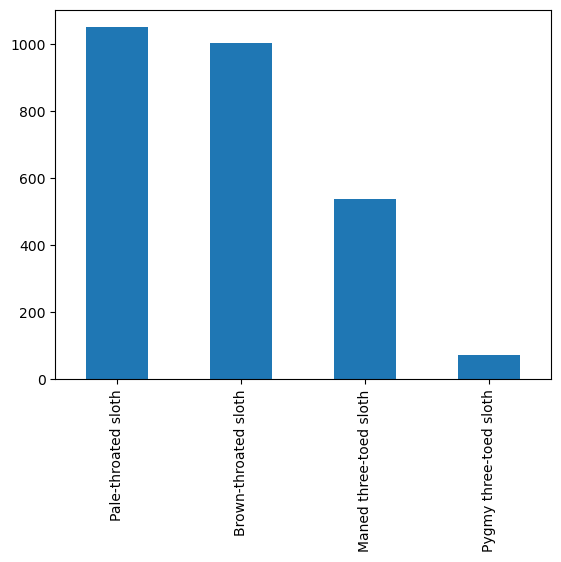

In [19]:

#######################IMPORTANT!!!!!!!!!!!###################################
#
# uncomment to do analysis for three_toed or two toed -> note there are only two species of two toed sloth so not particularily
# interesting to explore
#
###############################################################################

#Split data based on species. 

sloths_sub = sloths.loc[(sloths["specie"] == "three_toed")]
#sloths_sub = sloths.loc[(sloths["specie"] == "two_toed")]

sloths_sub['sub_specie'].value_counts().plot.bar()

As before we begin with analysing the distribution of the data. The three-toed sub species data is imbalanced, which will be taken into account moving forward. To allow the use of the ROC AUC metric, numerically map the sub species class from 0-3. 

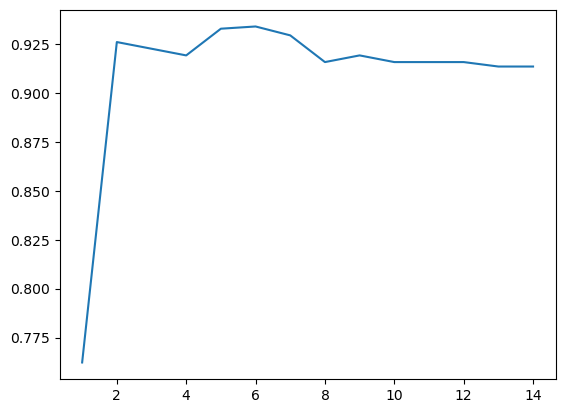

In [20]:
#train test split
#ensure 'shuffle = True' to account for the imbalanced dataset

to_drop_sloth = ['Unnamed: 0','endangered','specie','sub_specie']
sloths_sub_X = sloths_sub.drop(to_drop_sloth,axis=1)
sloths_sub_y = sloths_sub['sub_specie']

species = sloths_sub["specie"].unique()

#want to use ROC_AUC score as a measure of the quality of the model because the dataset is imbalanced, therefore numerically map the data.
if species == 'three_toed':

    codes = {'Pygmy three-toed sloth':0, 'Maned three-toed sloth':1, 'Pale-throated sloth':2, 'Brown-throated sloth':3}
    sloths_sub_y = sloths_sub_y.map(codes)

elif species == 'three_toed':
    
    codes = {'Linnaeus’s two-toed sloth':0, 'Hoffman’s two-toed sloth':1}
    sloths_sub_y = sloths_sub_y.map(codes)


sloths_sub_X_train, sloths_sub_X_test, sloths_sub_y_train, sloths_sub_y_test = train_test_split(sloths_sub_X, sloths_sub_y,shuffle=True, test_size=0.33, random_state=42)

#from previous analysis, we know data has outliers, so scale
scaler = StandardScaler()
sloths_sub_X_stdscale_train = scaler.fit_transform(sloths_sub_X_train)
sloths_sub_X_stdscale_test = scaler.transform(sloths_sub_X_test)

#testing if scaling matters for the sub-species dataset. Once again accuracy is unchanged with/without scaling
#sloths_sub_X_stdscale_train = sloths_sub_X_train
#sloths_sub_X_stdscale_test = sloths_sub_X_test

accuracy_sub = []
depth = range(1,15)

for i in range(1,15):

    sloths_sub_model = DecisionTreeClassifier(random_state = 42, max_depth = i)

    sloths_sub_model.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)

    sloths_sub_y_pred = sloths_sub_model.predict(sloths_sub_X_stdscale_test)
    accuracy_sub.append(accuracy_score(sloths_sub_y_test, sloths_sub_y_pred))
    
plt.plot(depth, accuracy_sub)

In [21]:
#for three toed sloths the peak depth is 6. For two toed the peak depth is 4


if species == 'three_toed':
    sloths_sub_model = DecisionTreeClassifier(random_state = 42, max_depth = 6)
elif species == 'two_toed':
    sloths_sub_model = DecisionTreeClassifier(random_state = 42, max_depth = 4)

sloths_sub_model.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)

sloths_sub_y_pred = sloths_sub_model.predict(sloths_sub_X_stdscale_test)
sloths_sub_y_pred_proba = sloths_sub_model.predict_proba(sloths_sub_X_stdscale_test)

dt_sub_accuracy = accuracy_score(sloths_sub_y_test, sloths_sub_y_pred)
dt_classification_report = classification_report(sloths_sub_y_test, sloths_sub_y_pred, output_dict=True)
dt_lowest_f1 = dt_classification_report['0']['f1-score']
dt_roc_auc = roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovo', average = 'macro')

#Print accuracy of model
print('Accuracy Score: \n',accuracy_score(sloths_sub_y_test, sloths_sub_y_pred))
print('Classification Report: \n', classification_report(sloths_sub_y_test, sloths_sub_y_pred))
print('Lowest f1-score \n', dt_lowest_f1)
print('ROC AUC: \n', roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovo', average = 'weighted'))

Accuracy Score: 
 0.9340159271899886
Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.39      0.45        18
           1       0.93      0.85      0.89       191
           2       0.97      0.98      0.98       353
           3       0.92      0.96      0.94       317

    accuracy                           0.93       879
   macro avg       0.84      0.80      0.81       879
weighted avg       0.93      0.93      0.93       879

Lowest f1-score 
 0.45161290322580644
ROC AUC: 
 0.9571309486773864


While this model overall has a high accuracy, it is clear that this metric does no tell the whole story. The precision/recall/f1-score of the model with respect to the pygmy three-toed sloth is far lower than the others. Now as before, plot the most important features.

<AxesSubplot:ylabel='feature'>

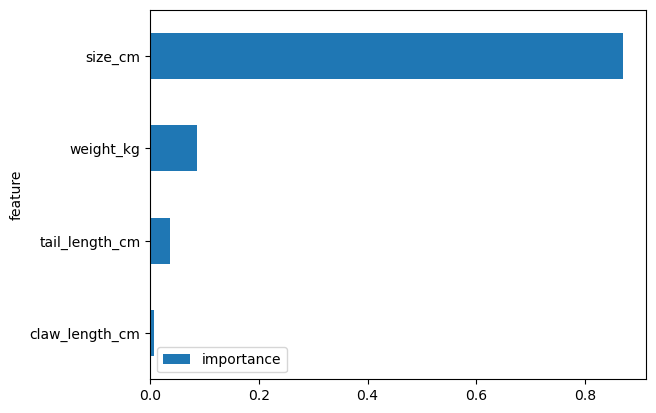

In [22]:
sloths_sub_features = sloths_sub_X.columns

sloths_sub_model.feature_importances_

list(zip(sloths_sub_features, sloths_sub_model.feature_importances_))

important_features = pd.DataFrame(list(zip(sloths_sub_features, sloths_sub_model.feature_importances_)), columns=['feature', 'importance'])
important_features.set_index('feature', inplace=True)
important_features.sort_values(by='importance').plot(kind='barh')

While tail length was most important for distinguishing between species of sloth, sloth size is most important for distinguishing between sub-species of sloths. Next we will plot the two most important features.

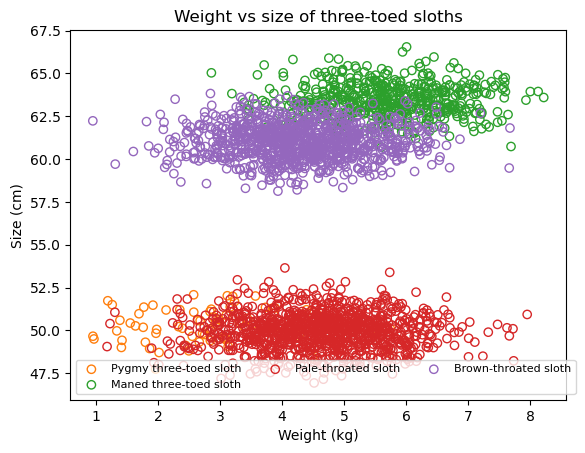

In [23]:
#section plot distribution of two most important features for classification of sub species of sloth. Add in ability to plot the results
#from the two-toed sloth as well for completeness (Results not to be discussed for simplicity)

species = sloths_sub["specie"].unique()


cmap = plt.get_cmap("tab10")

if species == 'three_toed':
    pygmy = sloths.loc[(sloths["sub_specie"] == "Pygmy three-toed sloth"), ["sub_specie", "weight_kg", "size_cm"]]
    maned = sloths.loc[(sloths["sub_specie"] == "Maned three-toed sloth"), ["sub_specie", "weight_kg", "size_cm"]]
    pale = sloths.loc[(sloths["sub_specie"] == "Pale-throated sloth"), ["sub_specie", "weight_kg", "size_cm"]]
    brown = sloths.loc[(sloths["sub_specie"] == "Brown-throated sloth"), ["sub_specie", "weight_kg", "size_cm"]]

    pygmy_plt = plt.scatter(pygmy["weight_kg"], pygmy["size_cm"], facecolors='none', edgecolors=cmap(1))
    maned_plt = plt.scatter(maned["weight_kg"], maned["size_cm"], facecolors='none', edgecolors=cmap(2))
    pale_plt = plt.scatter(pale["weight_kg"], pale["size_cm"], facecolors='none', edgecolors=cmap(3))
    brown_plt = plt.scatter(brown["weight_kg"], brown["size_cm"], facecolors='none', edgecolors=cmap(4))

    plt.legend((pygmy_plt, maned_plt, pale_plt, brown_plt),
           ('Pygmy three-toed sloth', 'Maned three-toed sloth', 'Pale-throated sloth', 'Brown-throated sloth'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
    
    plt.title('Weight vs size of three-toed sloths')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Size (cm)')
    plt.show()

elif species == 'two_toed':
    linnaeus = sloths.loc[(sloths["sub_specie"] == "Linnaeus’s two-toed sloth"), ["sub_specie", "claw_length_cm", "size_cm"]]
    hoffman = sloths.loc[(sloths["sub_specie"] == "Hoffman’s two-toed sloth"), ["sub_specie", "claw_length_cm", "size_cm"]]

    linnaeus_plt = plt.scatter(linnaeus["claw_length_cm"], linnaeus["size_cm"], facecolors='none', edgecolors=cmap(1))
    hoffman_plt = plt.scatter(hoffman["claw_length_cm"], hoffman["size_cm"], facecolors='none', edgecolors=cmap(2))

    plt.legend((linnaeus_plt, hoffman_plt),
           ('Linnaeus’s two-toed sloth', 'Hoffman’s two-toed sloth'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)
    
    plt.title('Claw Length vs size of two-toed sloths')
    plt.xlabel('Claw Length (cm)')
    plt.ylabel('Size (cm)')
    plt.show()

The above plot shows that while some sub species of three-toed sloths have clear boundaries between clusters, the pygmy three-toed sloth and pale-throated sloth have a lot of overlap, which was expected as the precision/recall/f1-score for this feature was low. Is it a small Pale-throated sloth or a big Pygmy three-toed sloth? Perhaps some more complex models can improve this metric. As before we will use random forest and gradient boosting classifer. To start we will use default hyper-parameters.

In [24]:

gbc_sub_model = GradientBoostingClassifier(random_state=42)
gbc_sub_model.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)
sloths_sub_y_pred = gbc_sub_model.predict(sloths_sub_X_stdscale_test)
sloths_sub_y_pred_proba = gbc_sub_model.predict_proba(sloths_sub_X_stdscale_test)

gbc_sub_accuracy = accuracy_score(sloths_sub_y_test, sloths_sub_y_pred)
gbc_classification_report = classification_report(sloths_sub_y_test, sloths_sub_y_pred, output_dict=True)
gbc_lowest_f1 = gbc_classification_report['0']['f1-score']
gbc_roc_auc = roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovo', average = 'weighted')

print('Accuracy Score: \n', accuracy_score(sloths_sub_y_test, sloths_sub_y_pred))
print('Classification Report: \n', classification_report(sloths_sub_y_test, sloths_sub_y_pred))
print('Lowest f1-score \n', gbc_lowest_f1)
print('ROC AUC: \n', roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovo', average = 'weighted'))


Accuracy Score: 
 0.9453924914675768
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.44      0.53        18
           1       0.92      0.90      0.91       191
           2       0.97      0.99      0.98       353
           3       0.94      0.95      0.95       317

    accuracy                           0.95       879
   macro avg       0.87      0.82      0.84       879
weighted avg       0.94      0.95      0.94       879

Lowest f1-score 
 0.5333333333333333
ROC AUC: 
 0.9875295746006745


Plot Variable Importance

In [25]:
# Plotting this adds no new information as the feature importances remain consistent from what was previously discovered using the
# decision tree classifer.

# importance = gbc_sub_model.feature_importances_
# importance = pd.DataFrame(importance, 
#                           columns=["Importance"],
#                           index = sloths_sub_X.columns
#                          )

# print(importance.iloc[:, 0])

# importance.sort_values(by='Importance').plot(kind='barh')

In [26]:

rf_sub_model = RandomForestClassifier(random_state=42)
rf_sub_model.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)
sloths_sub_y_pred = rf_sub_model.predict(sloths_sub_X_stdscale_test)
sloths_sub_y_pred_proba = rf_sub_model.predict_proba(sloths_sub_X_stdscale_test)

rf_sub_accuracy = accuracy_score(sloths_sub_y_test, sloths_sub_y_pred)
rf_classification_report = classification_report(sloths_sub_y_test, sloths_sub_y_pred, output_dict=True)
rf_lowest_f1 = rf_classification_report['0']['f1-score']
rf_roc_auc = roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovo', average = 'weighted')

print('Accuracy Score: \n', accuracy_score(sloths_sub_y_test, sloths_sub_y_pred))
print('Classification Report: \n', classification_report(sloths_sub_y_test, sloths_sub_y_pred))
print('Lowest f1-score \n', rf_lowest_f1)
print('ROC AUC: \n', roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovo', average = 'weighted'))

Accuracy Score: 
 0.9453924914675768
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.92      0.91      0.91       191
           2       0.97      0.99      0.98       353
           3       0.94      0.95      0.95       317

    accuracy                           0.95       879
   macro avg       0.87      0.81      0.83       879
weighted avg       0.94      0.95      0.94       879

Lowest f1-score 
 0.4827586206896552
ROC AUC: 
 0.9821798325564423


Plot Variable Importance

In [27]:
# As noted above, uncomment as this adds no new information.
# importance = rf_sub_model.feature_importances_
# importance = pd.DataFrame(importance, 
#                           columns=["Importance"],
#                           index = sloths_sub_X.columns
#                          )

# print(importance.iloc[:, 0])

# importance.sort_values(by='Importance').plot(kind='barh')

What is most interesting about using these other models is that while the overall accuracy is similar to the decision tree classifier, the precision/recall/fi-score for the classification of the pygmy three-toed sloth improved using of both models.

In this next section we will explore if hyperp-parameter tuning for the random forest and gradient boosting classifiers will improve the model performance. 

Use gridsearch to tune the hyper-parameters for both gradient boosting classifier and random forest. To handle the imbalanced data, use stratifiedkfolds in cross-validation. Also utilize roc_auc_ovr parameter for scoring. From the documentation:

'ovr':

    Stands for One-vs-rest. Computes the AUC of each class against the rest [3] [4]. This treats the multiclass case in the same way as the multilabel case. Sensitive to class imbalance even when average == 'macro', because class imbalance affects the composition of each of the ‘rest’ groupings.


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#'learning_rate': [0.1, 0.5],
#max_features default = none

param_grid_gbm = {
                  'n_estimators': [20, 50, 100],
                  #'max_features' : ['auto','sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  "min_samples_split": [2,4,6],
                  'max_depth' : [3,4,5,10],
                  }

gbm = GradientBoostingClassifier(random_state=42)

#because unbalanced data us stratified folds
kf = StratifiedKFold(n_splits=5, shuffle=True)

grid_gbm = GridSearchCV(estimator=gbm, 
                        param_grid=param_grid_gbm, 
                        #cv=kf,n_jobs = -1)
                        cv=kf,n_jobs = -1, scoring = 'roc_auc_ovr')

grid_gbm.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)

grid_gbm_accuracy = grid_gbm.best_score_

In [29]:
print(grid_gbm.best_score_)
print(grid_gbm.best_params_)
print(grid_gbm.best_estimator_)

0.9750350560929931
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
GradientBoostingClassifier(min_samples_leaf=2, n_estimators=50, random_state=42)


In [32]:

param_grid_df = { 
    'n_estimators': [10,100,200],
    'max_features': ['sqrt', 'auto'],
    #'max_depth' : [5,10,20],
    "min_samples_split": [2,4,6],
    "min_samples_leaf": [1, 2, 4],
    #'class_weight' :['balanced_subsample']  #<---- this makes the model much worse
}

#because unbalanced data us stratified folds
kf = StratifiedKFold(n_splits=5, shuffle=True)

rf=RandomForestClassifier(random_state=42)

grid_rfc = GridSearchCV(estimator=rf, 
                        param_grid=param_grid_df, 
                        cv=kf, 
                        scoring = 'roc_auc_ovr',
                        n_jobs = -1)
grid_rfc.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)

grid_rfc_accuracy = grid_rfc.best_score_



In [33]:
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)
print(grid_rfc.best_estimator_)

0.978900155209758
{'class_weight': 'balanced_subsample', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       min_samples_split=4, n_estimators=200, random_state=42)


Use optimized hyper-parameters to build the "best" models 

In [34]:
params = grid_rfc.best_params_

rf_best_sub_model = RandomForestClassifier(**params, random_state = 42)
rf_best_sub_model.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)
sloths_sub_y_pred = rf_best_sub_model.predict(sloths_sub_X_stdscale_test)
sloths_sub_y_pred_proba = rf_best_sub_model.predict_proba(sloths_sub_X_stdscale_test)

rf_best_sub_accuracy = accuracy_score(sloths_sub_y_test, sloths_sub_y_pred)
rf_best_classification_report = classification_report(sloths_sub_y_test, sloths_sub_y_pred, output_dict=True)
rf_best_lowest_f1 = rf_best_classification_report['0']['f1-score']
rf_best_roc_auc = roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovr', average = 'macro')

print('Accuracy Score: \n', accuracy_score(sloths_sub_y_test, sloths_sub_y_pred))
print('Classification Report: \n', classification_report(sloths_sub_y_test, sloths_sub_y_pred))
print('Lowest f1-score \n', rf_best_lowest_f1)
print('ROC AUC: \n', roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovr', average = 'macro'))



Accuracy Score: 
 0.9362912400455062
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.28      0.32        18
           1       0.92      0.90      0.91       191
           2       0.96      0.98      0.97       353
           3       0.94      0.95      0.95       317

    accuracy                           0.94       879
   macro avg       0.80      0.78      0.79       879
weighted avg       0.93      0.94      0.93       879

Lowest f1-score 
 0.3225806451612903
ROC AUC: 
 0.9829982804461803


In [164]:
params = grid_gbm.best_params_

gbc_best_sub_model = GradientBoostingClassifier(**params, random_state = 42)
gbc_best_sub_model.fit(sloths_sub_X_stdscale_train, sloths_sub_y_train)
sloths_sub_y_pred = gbc_best_sub_model.predict(sloths_sub_X_stdscale_test)
sloths_sub_y_pred_proba= gbc_best_sub_model.predict_proba(sloths_sub_X_stdscale_test)

gbc_best_sub_accuracy = accuracy_score(sloths_sub_y_test, sloths_sub_y_pred)
gbc_best_classification_report = classification_report(sloths_sub_y_test, sloths_sub_y_pred, output_dict=True)
gbc_best_lowest_f1 = gbc_best_classification_report['0']['f1-score']
gbc_best_roc_auc = roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovr', average = 'macro')

print('Accuracy Score: \n', accuracy_score(sloths_sub_y_test, sloths_sub_y_pred))
print('Classification Report: \n', classification_report(sloths_sub_y_test, sloths_sub_y_pred))
print('Lowest f1-score \n', gbc_best_lowest_f1)
print('ROC AUC: \n', roc_auc_score(sloths_sub_y_test, sloths_sub_y_pred_proba, multi_class='ovr', average = 'macro'))

Accuracy Score: 
 0.9419795221843004
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.55        18
           1       0.91      0.90      0.91       191
           2       0.97      0.98      0.98       353
           3       0.94      0.95      0.94       317

    accuracy                           0.94       879
   macro avg       0.86      0.83      0.84       879
weighted avg       0.94      0.94      0.94       879

Lowest f1-score 
 0.5454545454545454
ROC AUC: 
 0.9899833079646867


Optimizing the models based on the ROC AUC score and utilizing stratifiedkfolds in cross-validation did marginally improve the models to handle the imbalanced dataset. This will be examined in the graphs below.

Now use ensemble voting to attempt to improve the modelling.

In [165]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

num_folds = 10
kf = StratifiedKFold(n_splits=5, shuffle=True)

# create the sub models
estimators = []
estimators.append(('rf', rf_sub_model))
estimators.append(('gbm', gbc_sub_model))

estimators.append(('best_gbm', gbc_best_sub_model))
estimators.append(('best_rf', rf_best_sub_model))
estimators.append(('dt', sloths_sub_model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, sloths_sub_X_train, sloths_sub_y_train, cv=kf)

ensemble_accuracy = results.mean();

print(results.mean())

0.932135775658578


Surprisingly the ensemble method is no better than the default random forest or the default gradient boosting classifer. Will ommit from the charts and dicussion below as I did not have time to properly examine this model.

Compare all classification methods

In [166]:
import plotly.graph_objects as px

#data = [['Decision Tree', dt_sub_accuracy], ['RandomForest', rf_sub_accuracy],['GridSearch RandomForest', grid_rfc_accuracy], ['Gradient Boosting Classifier', gbc_sub_accuracy] ,
        #['GridSeach Gradient Boosting Classifer', grid_gbm_accuracy], ['Ensemble Voting', ensemble_accuracy] ]
#df = pd.DataFrame(data, columns=['Model Name', 'Accuracy'])

#fig = px.bar(df, x='Model Name', y='Accuracy', title = 'Accuracies of various models predicting sub-species of sloths')
#fig.show()


x = ['Decision Tree', 'RandomForest', 'GridSearch RandomForest', 'Gradient Boosting Classifier', 'GridSeach Gradient Boosting Classifer']
 
plot = px.Figure(data=[px.Bar(
    name = 'Accuracy',
    x = x,
    y = [dt_sub_accuracy, rf_sub_accuracy, rf_best_sub_accuracy, gbc_sub_accuracy, gbc_best_sub_accuracy]
   ),
                       px.Bar(
    name = 'ROC_AUC',
    x = x,
    y = [dt_roc_auc, rf_roc_auc, rf_best_roc_auc, gbc_roc_auc, gbc_best_roc_auc]
   )
],

layout=px.Layout(
        title=px.layout.Title(text="Model Accuracies and ROC AUC scores")

)
)

plot.show()
  

Plotting the accuracy and ROC AUC scores for all the models we can see apart from the decision tree base model there isn't a lot to choose from between the more complex models (I'd recommend zooming in on the axes so the lowest value in the y-axis is 0.9). Therefore, different metrics need to be considered in order to evaluate model. Originally I had planned to use the "macro avg f1 score" which would take into account the imbalanced nature of the dataset and provide insight into both the model performance with respect to recall and precision. However, all the "macro avg f1 score" results were very similar for the more complex models. Therefore, in order to to choose the optimal model, I examined the F1 score for the Pygmy three toed sloth (worst performing classification), where the largest differences between models was found. 

Plot the f1 scores for the three-toed pygmy sloth

In [168]:
import plotly.express as px

data = [['Decision Tree', dt_lowest_f1], ['RandomForest', rf_lowest_f1],['GridSearch RandomForest', rf_best_lowest_f1], ['Gradient Boosting Classifier', gbc_lowest_f1] ,
        ['GridSearch Gradient Boosting Classifer', gbc_best_lowest_f1]]
df = pd.DataFrame(data, columns=['Model Name', 'F1-score'])

fig = px.bar(df, x='Model Name', y='F1-score', title = 'F1-score of Pygmy Three-Toed classification models')
fig.show()

Once again, the models perform similarily, however the hyper-parameter tuned models (GridSearch RandomForest, and GridSearch Gradient Boosting Classifier), did have better f1-scores for the pygmy three-toed sloth class. Therefore, the best performing model, having the best ROC AUC score and the highest f1-score for the pygmy three-toed sloth, is the tuned gradient boosting classifier. 

Final thoughts

Using machine learning is very effective at classifying sloth species based on physical characteristics, which was demonstrated in the first section of this notebook. At first glance, it also appears to be very effective at classifying sloth sub species based on physical characteristics. However, upon closer inspection, the pygmy three-toed sloth turned out to be difficult to classify. The reason for this was two fold. Firstly, there were far fewer data points present in the dataset for this class, making the dataset very imbalanced. Next, the physical characteristics of this sub-species had a lot of overlap with the pale-throated sloth. So the question then became, 'is it a big pygmy three-toed sloth or just a small pale throated sloth?'. The sub-species' isolation on an island purports the idea that this is an example of 'island dwarfism' and gives credence to the idea that it is indeed a new species. This is a phenomenon where limited resources on an island push the evolution of smaller individuals within a species. So, in an attempt to improve the models, hyper-parameter turning and focusing the scoring on ROC AUC and using stratifiedkfolds in cross-validation did result in better results. Even still, the highest f1-score that was achieved was 0.58 using the tuned gradient boosting classifier. 

While this likely isn't the proper forum to discuss this, it does bring up a larger question of taxonomy in general. At what point is something considered to be a new sub-species, or just a population exhibiting some regional characteristics? Human characteristics vary across the globe in many aspects. Using height as an example, the tallest human population (Netherlands) are on average 1 ft taller than the shortest (Timor-Leste). In this case we don't designate the two as different sub-species. Perhaps machine learning can lend a more concrete/focused approach to sub-species differentiation.